## Multi-variate Analysis and Model Building on Budget Sales Data

### Build a multivariate linear regression model that can predict the product sales based on the advertising budget allocated to different channels. The features are TV Budget, Radio Budget, Newspaper Budget and the output is Sales (units)

The dataset is given below:

```csv
TV Budget ($),Radio Budget ($),Newspaper Budget ($),Sales (units)
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2
57.5,32.8,23.5,11.8
120.2,19.6,11.6,13.2
144.1,16.0,40.3,15.6
111.6,12.6,37.9,12.2
```


### Import required libraries

In [31]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

### Load the dataset and perform data cleaning

In [32]:
df = pd.read_csv('dataset/BudgetSales.csv')
df.head()

,TV Budget ($),Radio Budget ($),Newspaper Budget ($),Sales (units)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### since the dataset is very small , we can directly use without removing any duplicates or null values

In [33]:
# Clean column names (remove special characters)
df.columns = ['TV_Budget', 'Radio_Budget', 'Newspaper_Budget', 'Sales']
print("Cleaned column names:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Cleaned column names:
['TV_Budget', 'Radio_Budget', 'Newspaper_Budget', 'Sales']

Missing values:
TV_Budget           0
Radio_Budget        0
Newspaper_Budget    0
Sales               0
dtype: int64


In [34]:
#Filter X and y
X = df[['TV_Budget', 'Radio_Budget', 'Newspaper_Budget']].values
y = df['Sales'].values
print(f'X  is {X.ndim}')
X


X  is 2


array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [144.1,  16. ,  40.3],
       [111.6,  12.6,  37.9]])

### TrainTest Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print(X_train)

print(X_test)

[[ 17.2  45.9  69.3]
 [111.6  12.6  37.9]
 [180.8  10.8  58.4]
 [151.5  41.3  58.5]
 [ 57.5  32.8  23.5]]
[[144.1  16.   40.3]
 [ 44.5  39.3  45.1]
 [  8.7  48.9  75. ]
 [230.1  37.8  69.2]
 [120.2  19.6  11.6]]


### Build and train the multivariate linear regression model & calculate the model performance using R2 score and Mean Squared Error

In [36]:
# create the model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.1568431629394866
R^2 Score: 0.9154576997907069


### Let's Test it 

We will pass the following values to the model and check the output
   - TV Budget = 150
   - Radio Budget = 30
   - Newspaper Budget = 20

# Make predictions
input_data = np.array([[150, 30, 20]])
predicted_sales = model.predict(input_data)
print(f'Predicted Sales: {predicted_sales}')

In [37]:
input_data = np.array([[150, 30, 20]])
predicted_sales = model.predict(input_data)
print(f'Predicted Sales: {predicted_sales}')

Predicted Sales: [18.26222304]


### Now I will pass the same 2d array data to see if the predicted model is coming close to training data or not

In [38]:
print(f'X_train[1] is {X_train[1]}')
print(f'y_train[1] is {y_train[1]}')

X_train[1] is [111.6  12.6  37.9]
y_train[1] is 12.2


In [39]:
# Pass the same value to the model created


input_data = np.array([[111.6, 12.6, 37.9]])
predicted_sales = model.predict(input_data)
print(f'Predicted Sales for same X_train[1]: {predicted_sales}')
print(f'Actual Sales for same X_train[1]: {y_train[1]}')

print('--------------------------------')
print('------Metrics Check-------------')

mse = mean_squared_error([y_train[1]], predicted_sales)
mae = mean_absolute_error([y_train[1]], predicted_sales.ravel())
#r2 = r2_score([y_train[1]], predicted_sales)  will be irrelevant for single value``

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")



Predicted Sales for same X_train[1]: [11.02736625]
Actual Sales for same X_train[1]: 12.2
--------------------------------
------Metrics Check-------------
MSE: 1.3750699156633643
MAE: 1.1726337517159244
R2: 0.9154576997907069


### Lets plot the actual Sales Vs Predicted Sales for each of the training data points

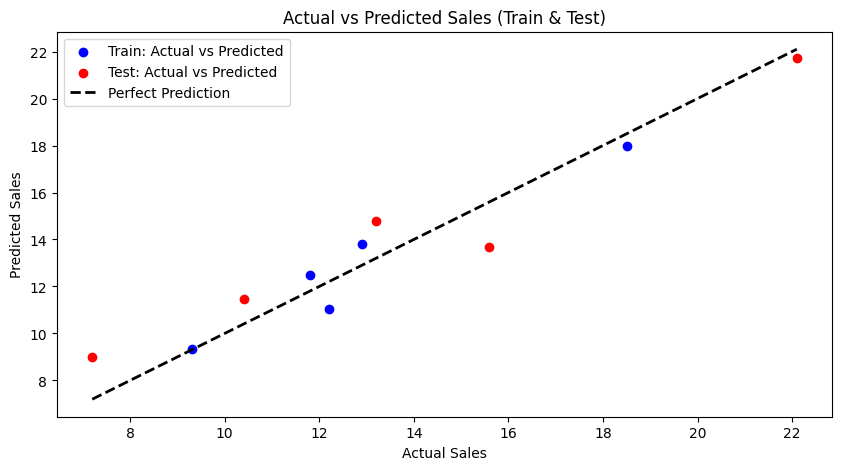

In [40]:
# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))

# Plot for training data
plt.scatter(y_train, y_train_pred, color='blue', label='Train: Actual vs Predicted')
# Plot for test data
plt.scatter(y_test, y_test_pred, color='red', label='Test: Actual vs Predicted')

# Reference line (perfect prediction)
min_y = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_y = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())
plt.plot([min_y, max_y], [min_y, max_y], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Train & Test)')
plt.legend()
plt.show()

## Thanks for your attention!